In [3]:
import pandas as pd
import numpy as np
kap=pd.read_csv("kap_score.csv")
score=kap['kap_score'].to_numpy()

In [4]:
scores=np.c_[np.unique(kap, return_counts=1)]
scores=scores.T
scores


array([[  1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,   4.5,   5. ,
          5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,   9.5,
         10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,  13.5,  14. ,
         14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,  18. ,  18.5,
         19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,  22.5,  23. ,
         23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,  27. ,  27.5,
         28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,  31.5,  32. ,
         32.5,  33. ,  33.5,  34. ,  34.5,  35. ,  35.5,  36. ,  36.5,
         37. ,  37.5,  38. ,  38.5,  39. ,  39.5,  40. ,  40.5,  41. ,
         42. ,  42.5,  43. ,  43.5,  44. ,  45. ,  45.5,  46. ,  47. ,
         48. ,  48.5,  51. ,  52.5,  53. ,  54. ,  55. ,  56. ,  57. ,
         58. ,  58.5,  59. ,  60. ,  62. ,  63. ,  64. ,  65.5,  73. ],
       [325. ,   7. , 298. ,  19. , 305. ,  28. , 310. ,  50. , 309. ,
         61. , 278. ,  62. , 251. ,  35. , 223. ,  36. , 214. ,  43. ,
     

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

Fitting 6 distributions: 100%|██████████| 6/6 [00:00<00:00,  9.23it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.017142,1205.541688,-59466.726171,inf,0.084056,1.240391e-29
lognorm,0.017994,1197.640857,-59244.921167,inf,0.052186,1.117450e-11
burr,0.019873,1361.399135,-58764.750617,inf,0.139863,1.723060e-81
rayleigh,0.028060,1893.468256,-57143.691399,inf,0.150574,1.914595e-94
gamma,0.032379,1242.443829,-56455.443400,inf,0.210949,7.415532e-186


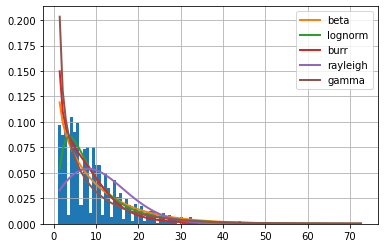

In [7]:
f = Fitter(score,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm",
                          "rayleigh"])
f.fit()
f.summary()

In [8]:
import scipy.stats
scipy.stats.beta.fit(score)

(0.8913760845287697, 33.9947834962461, 0.9999999999999999, 371.65182264096006)

In [9]:
rv=scipy.stats.beta(2.3824842269108624, 53477623160435.664)
rv.pdf(1)

0.0

In [10]:
from scipy.stats import beta,burr
a, b = 1., 2.
x = beta.rvs(a, b, size=1000)

In [11]:
x

array([1.56663036e-01, 4.22535927e-01, 1.42978773e-01, 5.47963317e-01,
       1.89825165e-01, 5.16563155e-01, 4.41312981e-01, 5.38500889e-01,
       5.76184889e-01, 9.68438770e-01, 6.04212828e-02, 2.39467302e-01,
       4.79497357e-01, 2.04807525e-02, 2.10811621e-01, 8.42275837e-01,
       5.06628372e-01, 1.23249736e-01, 6.41442513e-01, 3.79622913e-01,
       7.80069889e-02, 7.74136369e-01, 2.90576238e-01, 6.00039078e-01,
       5.73700780e-01, 2.41366869e-01, 7.50327151e-01, 6.11027501e-01,
       3.71785433e-01, 7.37389585e-02, 6.94730467e-01, 2.46522087e-01,
       1.39652749e-01, 1.52324126e-01, 4.93705085e-01, 1.60827810e-01,
       3.80512108e-02, 7.01785706e-01, 3.47286963e-01, 3.94083411e-01,
       5.05505406e-01, 3.42029099e-01, 9.19935923e-01, 5.43973592e-01,
       6.34227930e-02, 1.05163077e-02, 6.86133927e-01, 2.88095849e-01,
       4.31901288e-01, 8.33232825e-01, 2.42742831e-01, 5.04745825e-02,
       5.67042871e-01, 1.94482056e-01, 4.66903055e-01, 3.63513474e-01,
      

In [12]:
score

array([ 2., 16.,  4., ...,  2.,  4., 29.])

In [13]:
burr.fit(score)

(3.2897775775199896,
 0.21923182504537464,
 0.9999999999999869,
 13.129008822460651)

In [14]:
beta.fit(score)

(0.8913760845287697, 33.9947834962461, 0.9999999999999999, 371.65182264096006)

In [14]:
dist=beta(0.8913760845287697, 33.9947834962461)

In [15]:
from scipy.stats import percentileofscore
dist.cdf(0.01)

0.34217119020851827

In [16]:
beta.stats(0.8913760845287697, 33.9947834962461,moments='mvsk')

(array(0.02555099), array(0.00069381), array(1.95328726), array(5.41356978))

In [17]:
dist.ppf(0.5)*371.65+1

7.388192946501759

In [34]:
mn=10000
a=mn-0.33*mn
b=mn+0.33*mn
m=mn
alpha=2*(b+4*m-5*a)/(3*(b-a))*(1+4*(m-a)*(b-m)/((b-a)**2))
betaa= 2*(5*b-4*m-a)/(3*(b-a))*(1+4*(m-a)*(b-m)/((b-a)**2))

In [35]:
alpha

4.0

4.000000000000001